In [1]:
import cv2
import glob
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
!unzip HW5.zip

--2022-07-12 15:54:41--  https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l5lg0yrs1k7ydmb/HW5.zip [following]
--2022-07-12 15:54:42--  https://www.dropbox.com/s/raw/l5lg0yrs1k7ydmb/HW5.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b65ca9939e997d217a5e7c5fb.dl.dropboxusercontent.com/cd/0/inline/Bo8iv9TZUw-EvPjSUqnb4FSgpHA765AeGKYMrr2a_9m8AQE2gq-dW6UXKdHLK7vD39psn6AvTUBcnreQEUzLwtpQpwdD24YbDEsmuiajDxSpc43fdZ4647_tr6yx-RxEmIcBThq-3S1dkzrDgtCvobbfatPFjM7U7xwmw4FOoaVDLg/file# [following]
--2022-07-12 15:54:42--  https://uc7b65ca9939e997d217a5e7c5fb.dl.dropboxusercontent.com/cd/0/inline/Bo8iv9TZUw-EvPjSUqnb4FSgpHA765AeGKYMrr2a_9m8AQE2gq-dW6UXKdHLK7vD39psn6AvTUBcnreQEUz

In [3]:
def apply_filter(func, kernel, title):
    
    image_paths = sorted(glob.glob('./HW5/images/*.jpg'))
    thresholds = [0.4, 0.4, 0.5, 0.5, 0.35]

    fig = plt.figure(figsize=(15, 35))

    print('Kernel:')
    print(kernel)

    for i, ip in enumerate(image_paths):

        image = cv2.imread(ip, cv2.IMREAD_GRAYSCALE).astype('float32') / 255

        t = thresholds[i]

        bin_img = image
        bin_img[bin_img < t] = 0
        bin_img[bin_img >= t] = 1

        filtered = func(image, kernel)

        ax = plt.subplot(5, 2, 2*i + 1)
        ax.set_title('Original Image')
        ax.imshow(bin_img, cmap='gray')
        ax = plt.subplot(5, 2, 2*i + 2)
        ax.set_title(title)
        ax.imshow(filtered, cmap='gray')
        
    plt.show()

In [4]:
def dilate(x, kernel):
    y = ndimage.convolve(x, kernel)
    y[y > 0] = 1
    y[y <= 0] = 0
    return y

def erode(x, kernel):
    y = ndimage.convolve(x, kernel)
    th = kernel.sum()
    y[y < th] = 0
    y[y > 0] = 1
    return y

def opening(x, kernel):
    eroded = erode(x, kernel)
    opened = dilate(eroded, kernel)
    return opened

def closing(x, kernel):
    dilated = dilate(x, kernel)
    closed = erode(dilated, kernel)
    return closed

In [5]:
kernels = [
    np.array([[0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 1, 1, 1],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]]),
    
    np.array([[0, 0, 1, 0, 0],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [0, 0, 1, 0, 0]]),
           
    np.array([[1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1]])
]

# Dilation

Kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


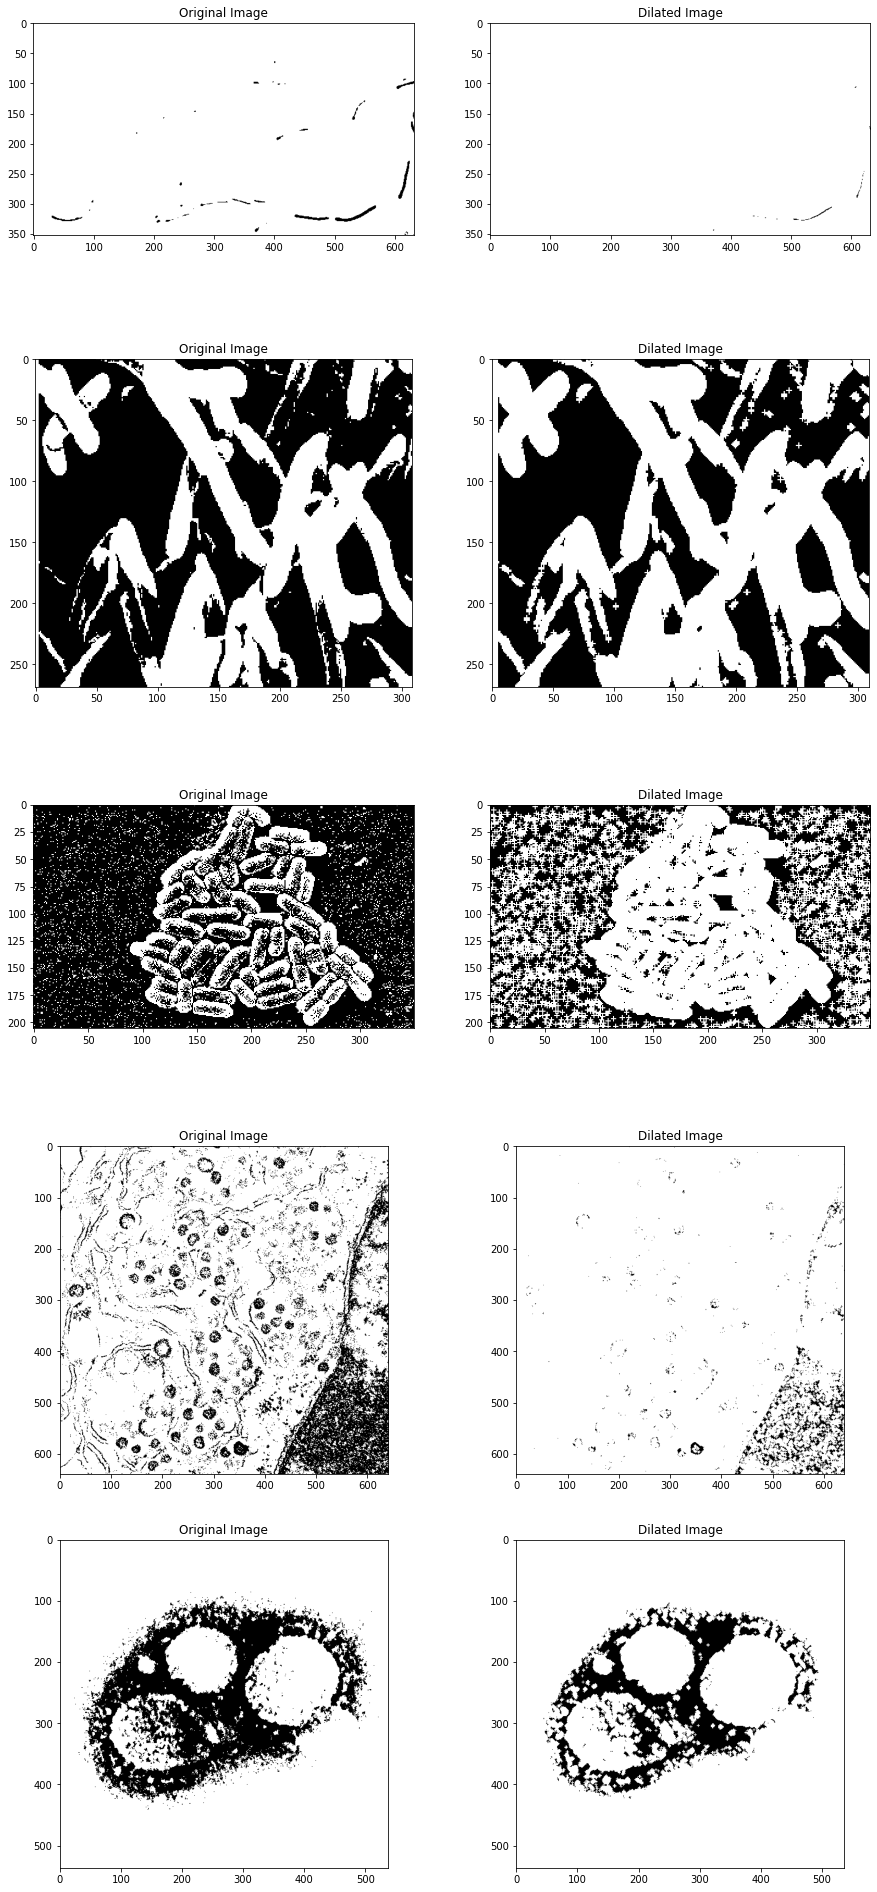

In [6]:
func = lambda a, b: dilate(a, b)
# func = lambda a, b: cv2.dilate(a, b, iterations=1)

apply_filter(func, kernels[0], 'Dilated Image')


Kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


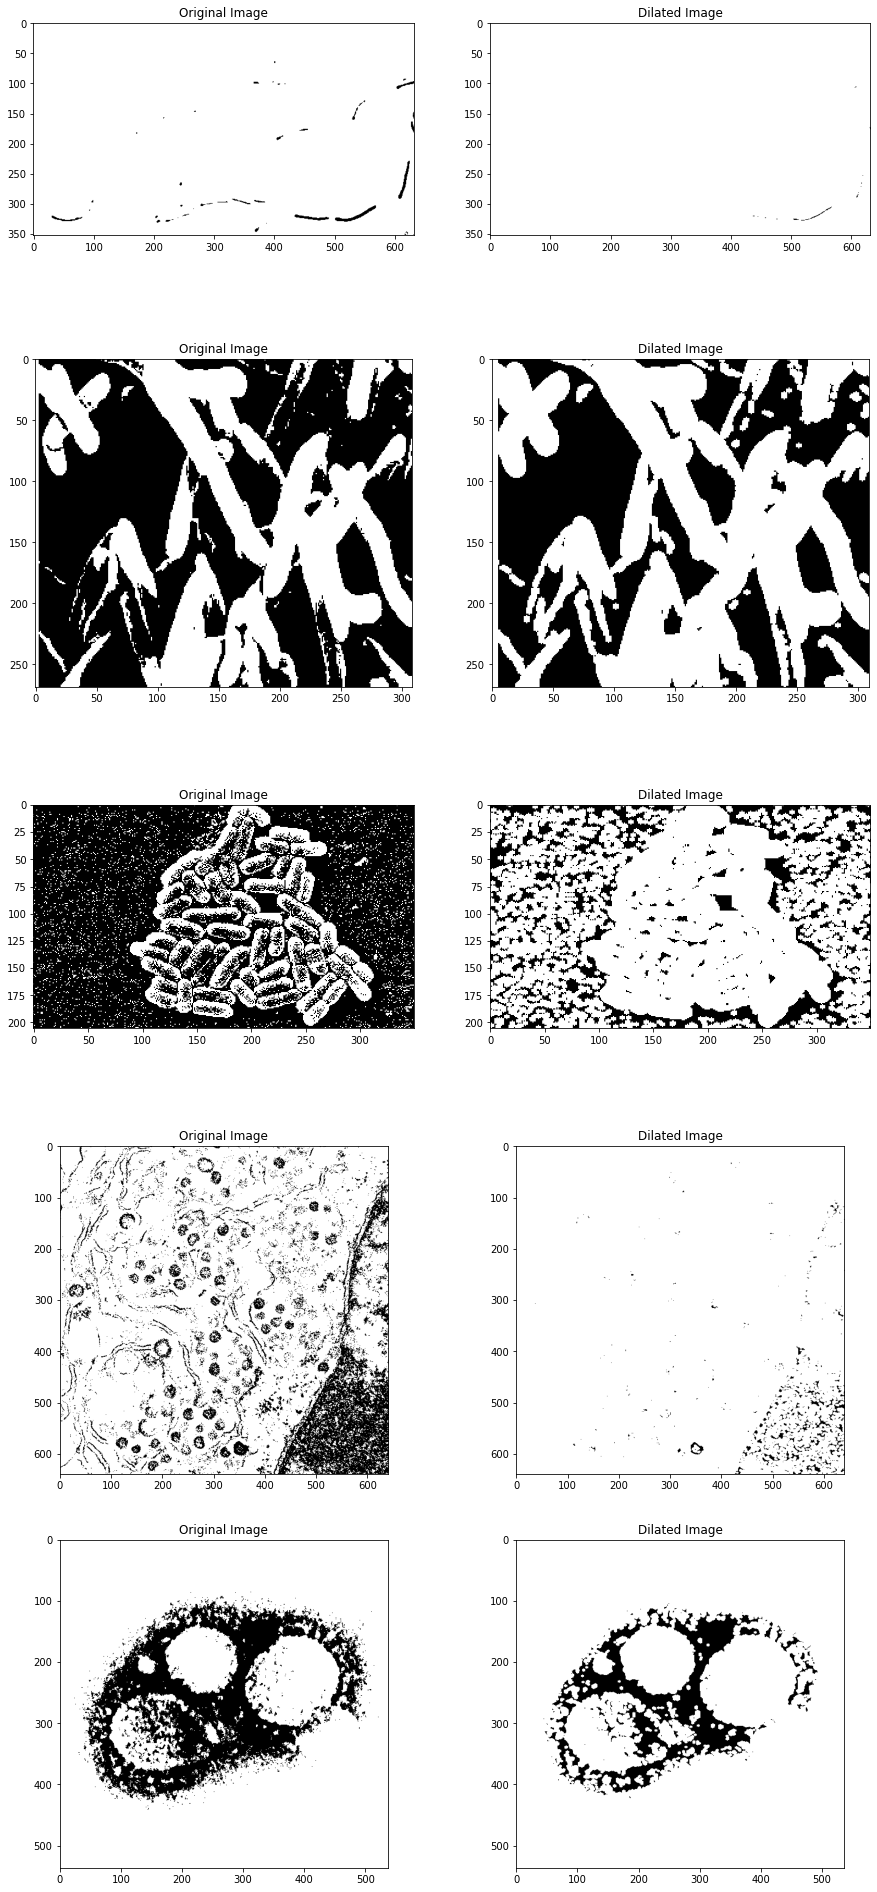

In [7]:
func = lambda a, b: dilate(a, b)
# func = lambda a, b: cv2.dilate(a, b, iterations=1)

apply_filter(func, kernels[1], 'Dilated Image')


Kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


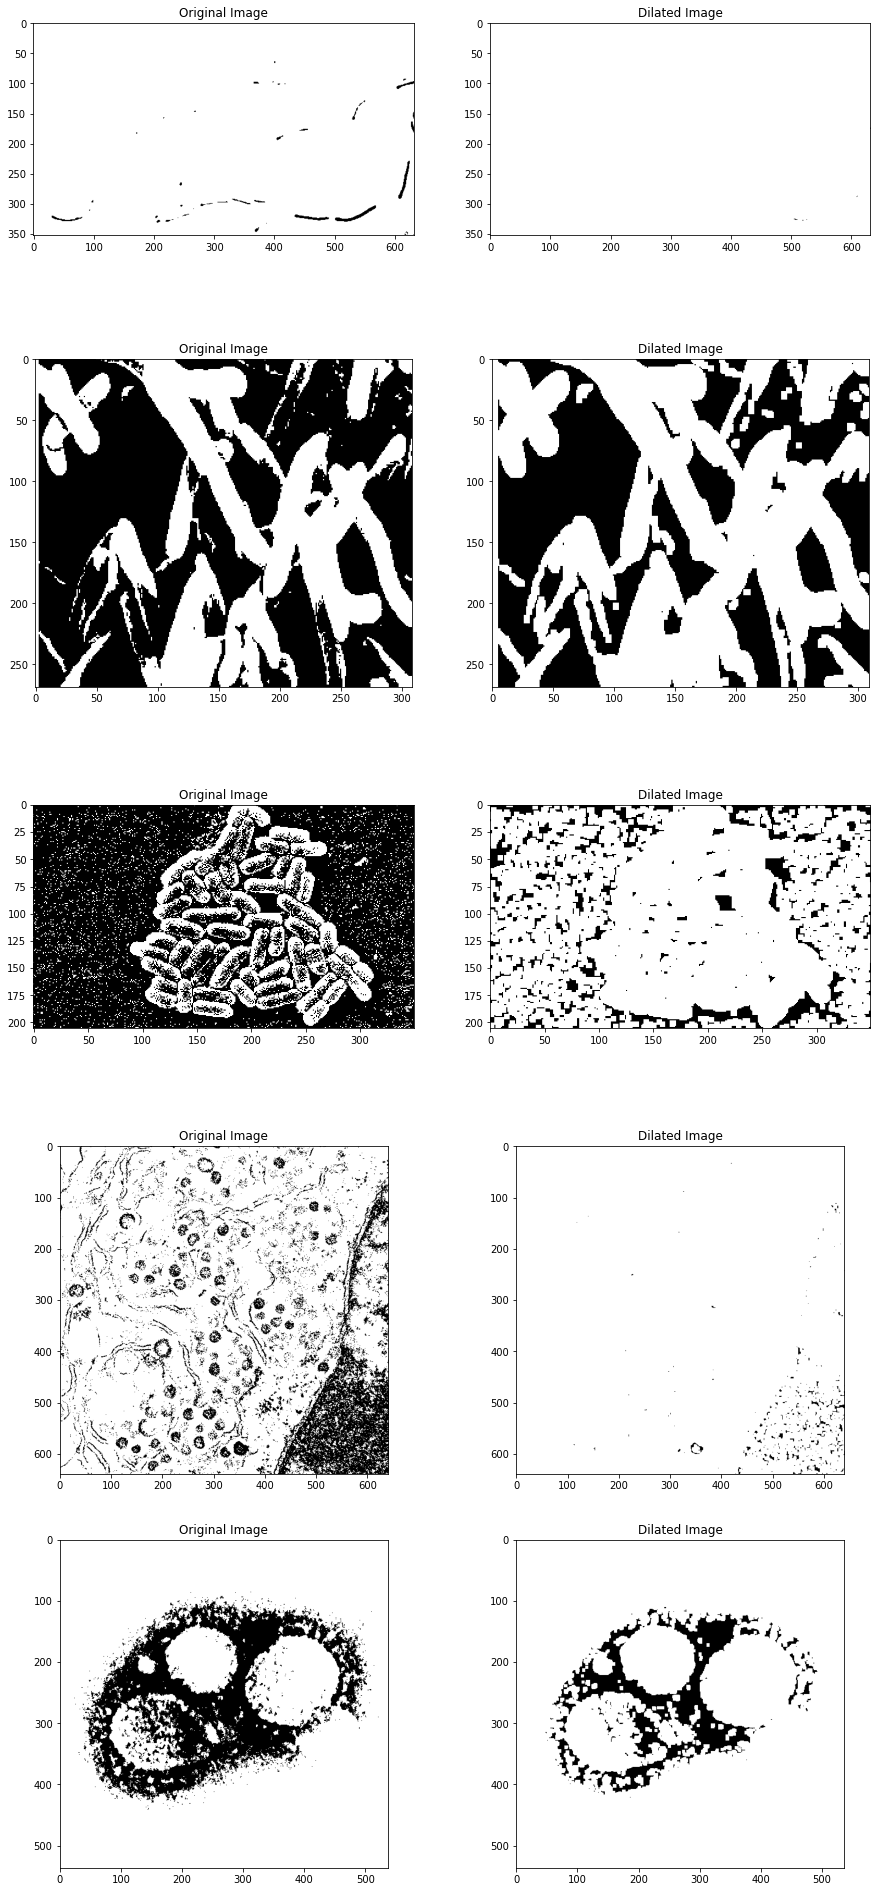

In [8]:
func = lambda a, b: dilate(a, b)
# func = lambda a, b: cv2.dilate(a, b, iterations=1)

apply_filter(func, kernels[2], 'Dilated Image')


# Erosion

Kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


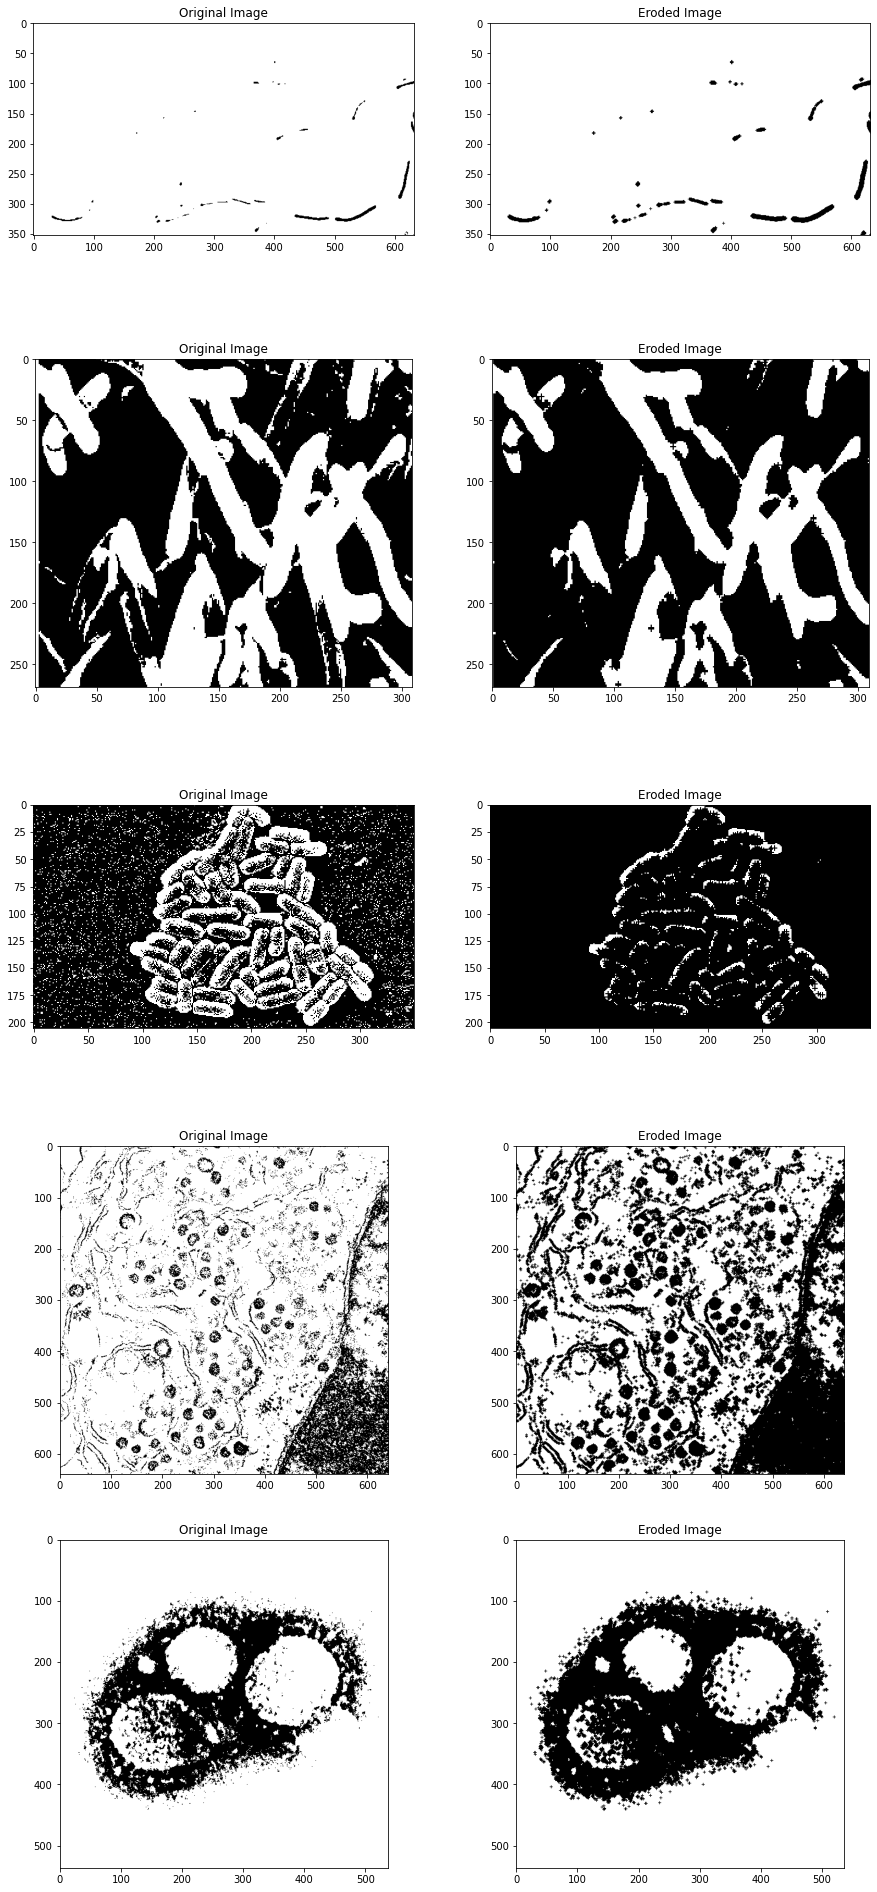

In [9]:
func = lambda a, b: erode(a, b)
# func = lambda a, b: cv2.erode(a, b, iterations=1)

apply_filter(func, kernels[0], 'Eroded Image')


Kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


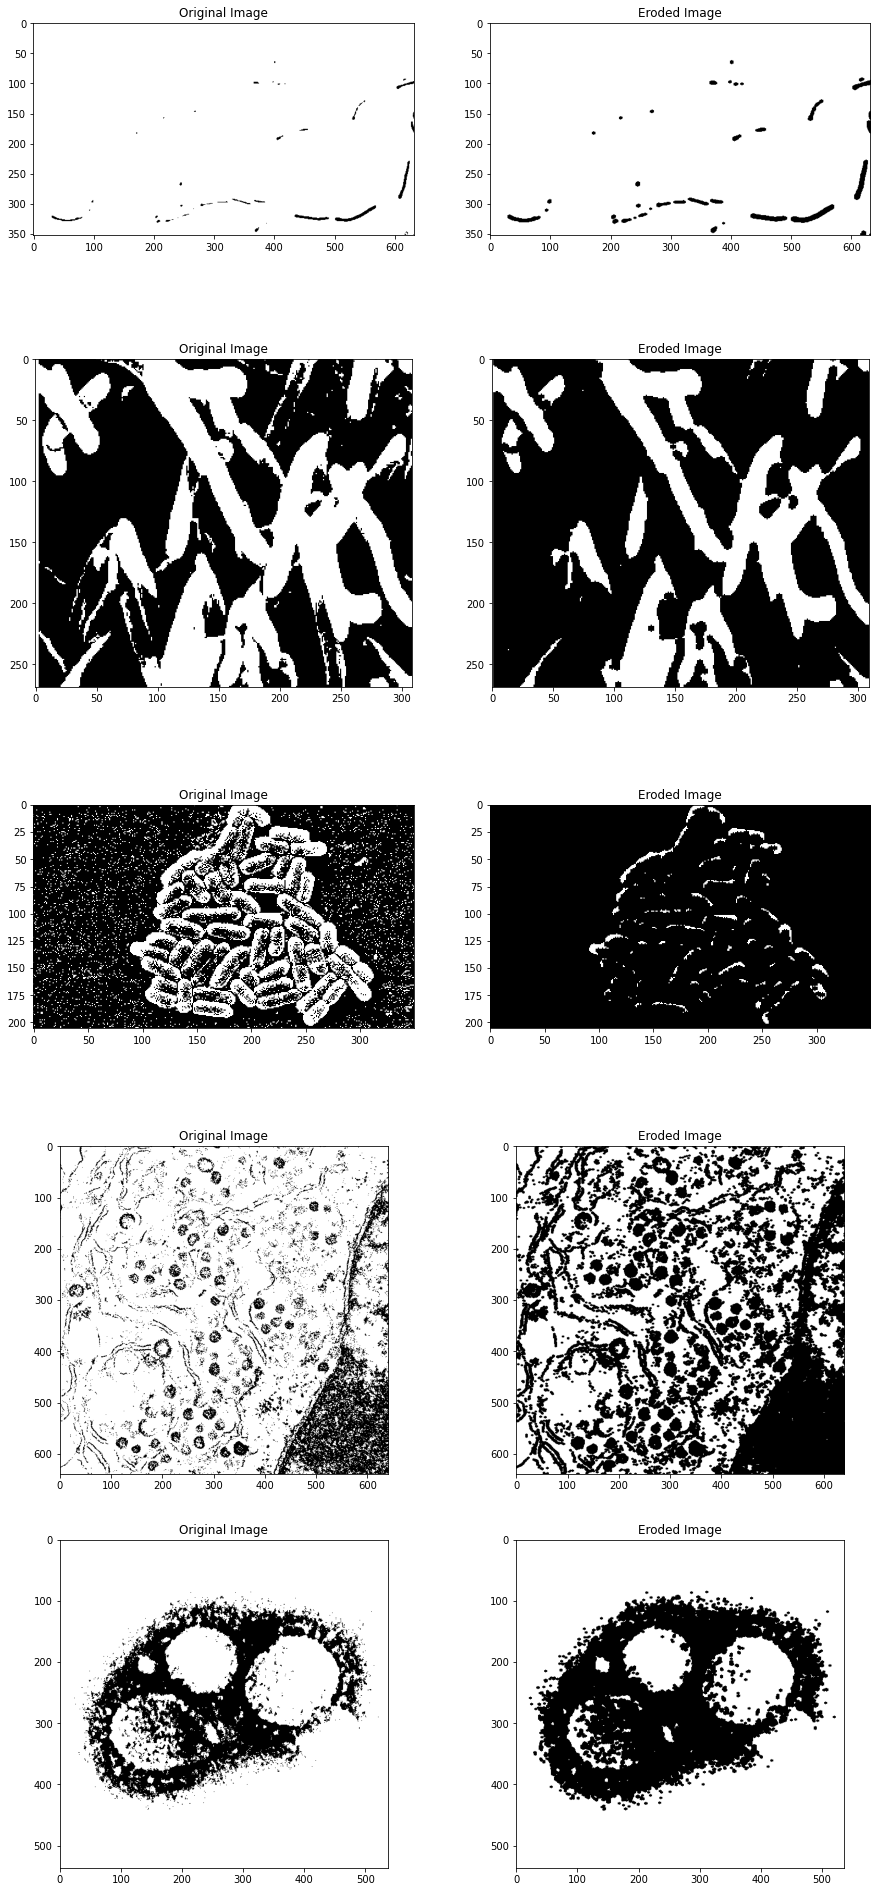

In [10]:
func = lambda a, b: erode(a, b)
# func = lambda a, b: cv2.erode(a, b, iterations=1)

apply_filter(func, kernels[1], 'Eroded Image')

Kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


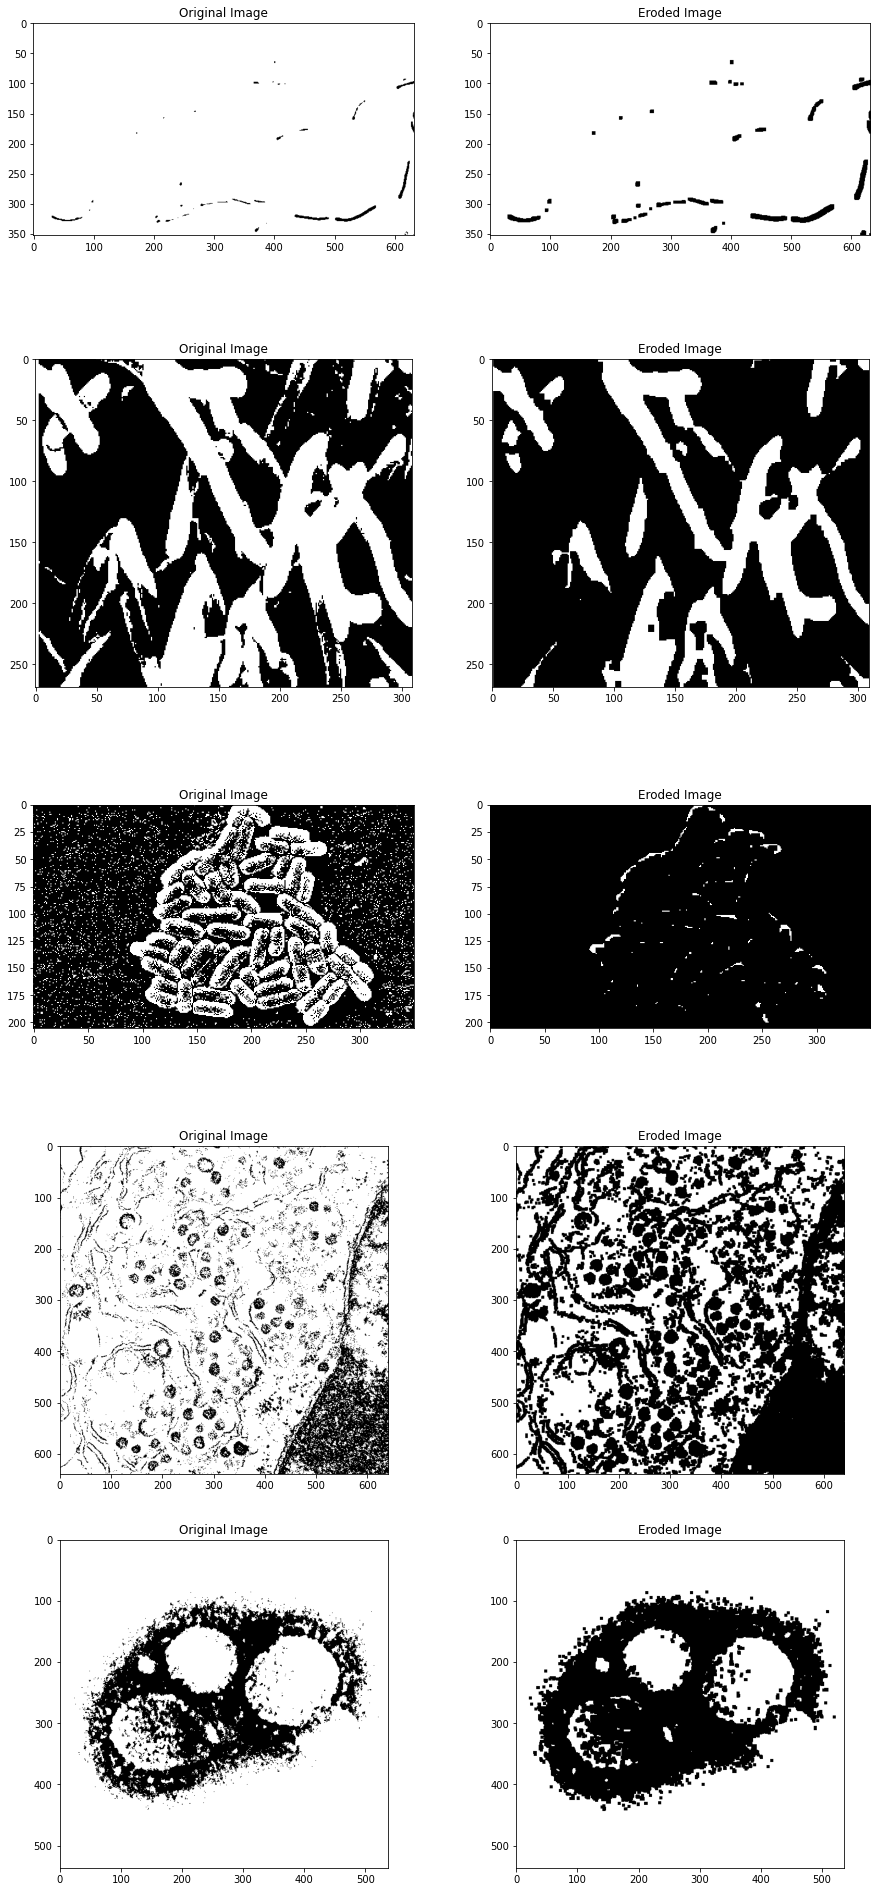

In [11]:
func = lambda a, b: erode(a, b)
# func = lambda a, b: cv2.erode(a, b, iterations=1)

apply_filter(func, kernels[2], 'Eroded Image')

# Opening

Kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


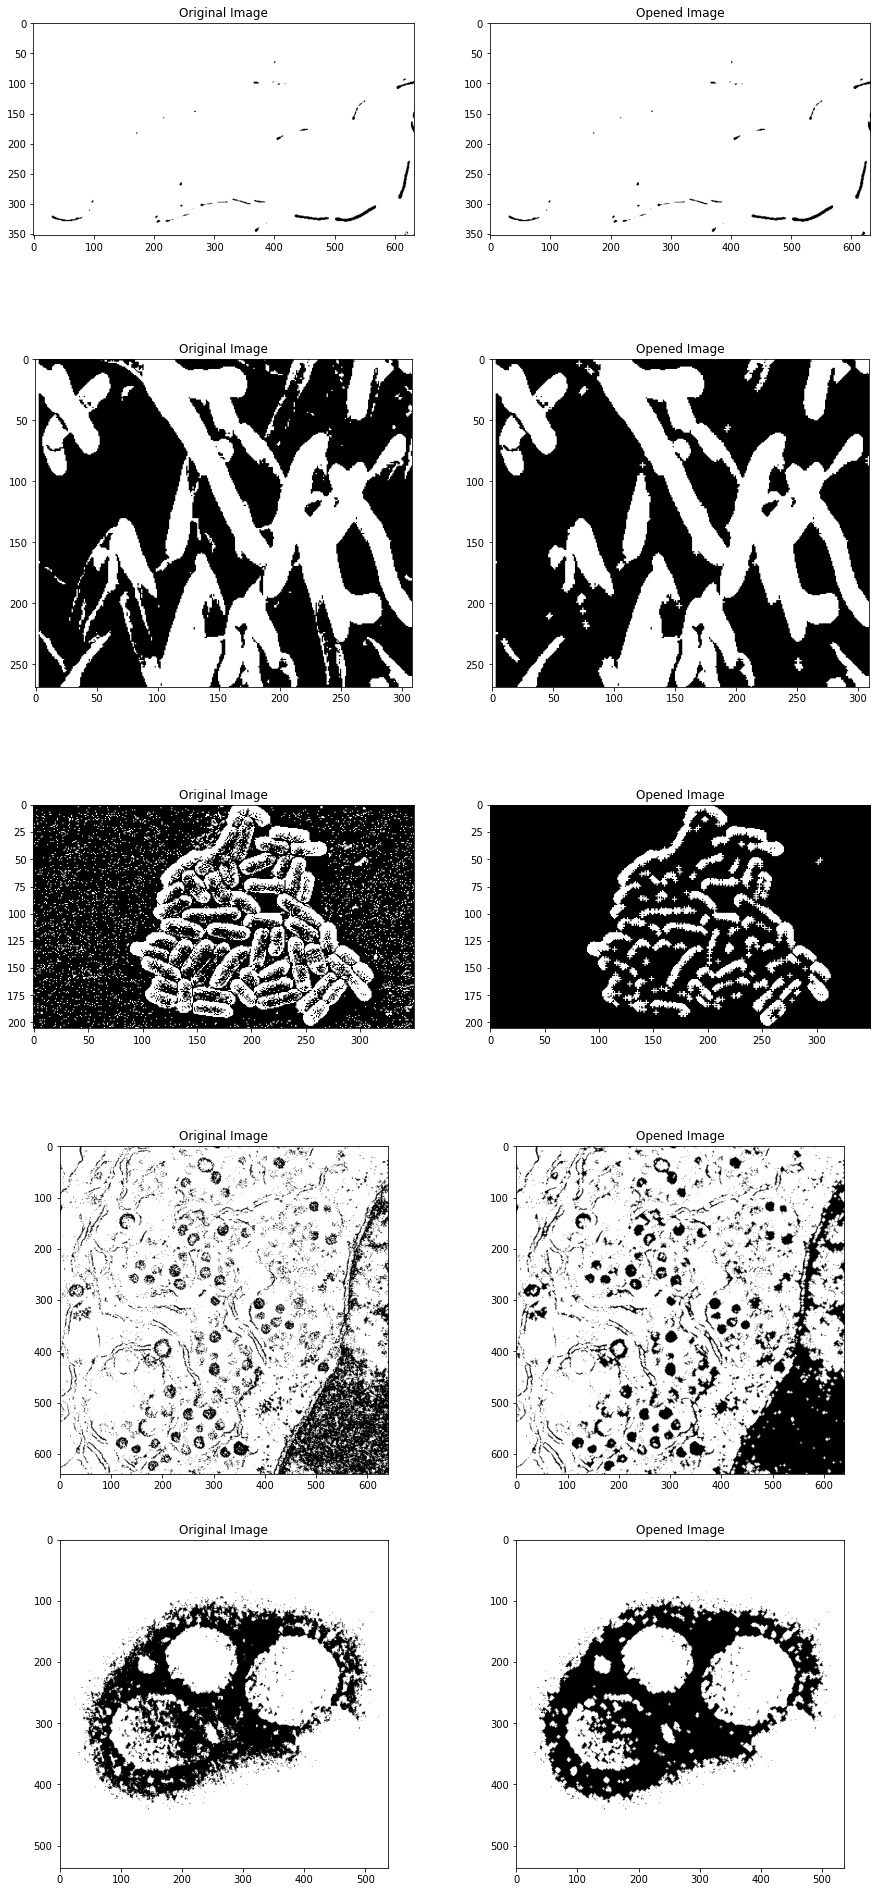

In [12]:
func = lambda a, b: opening(a, b)

apply_filter(func, kernels[0], 'Opened Image')


Kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


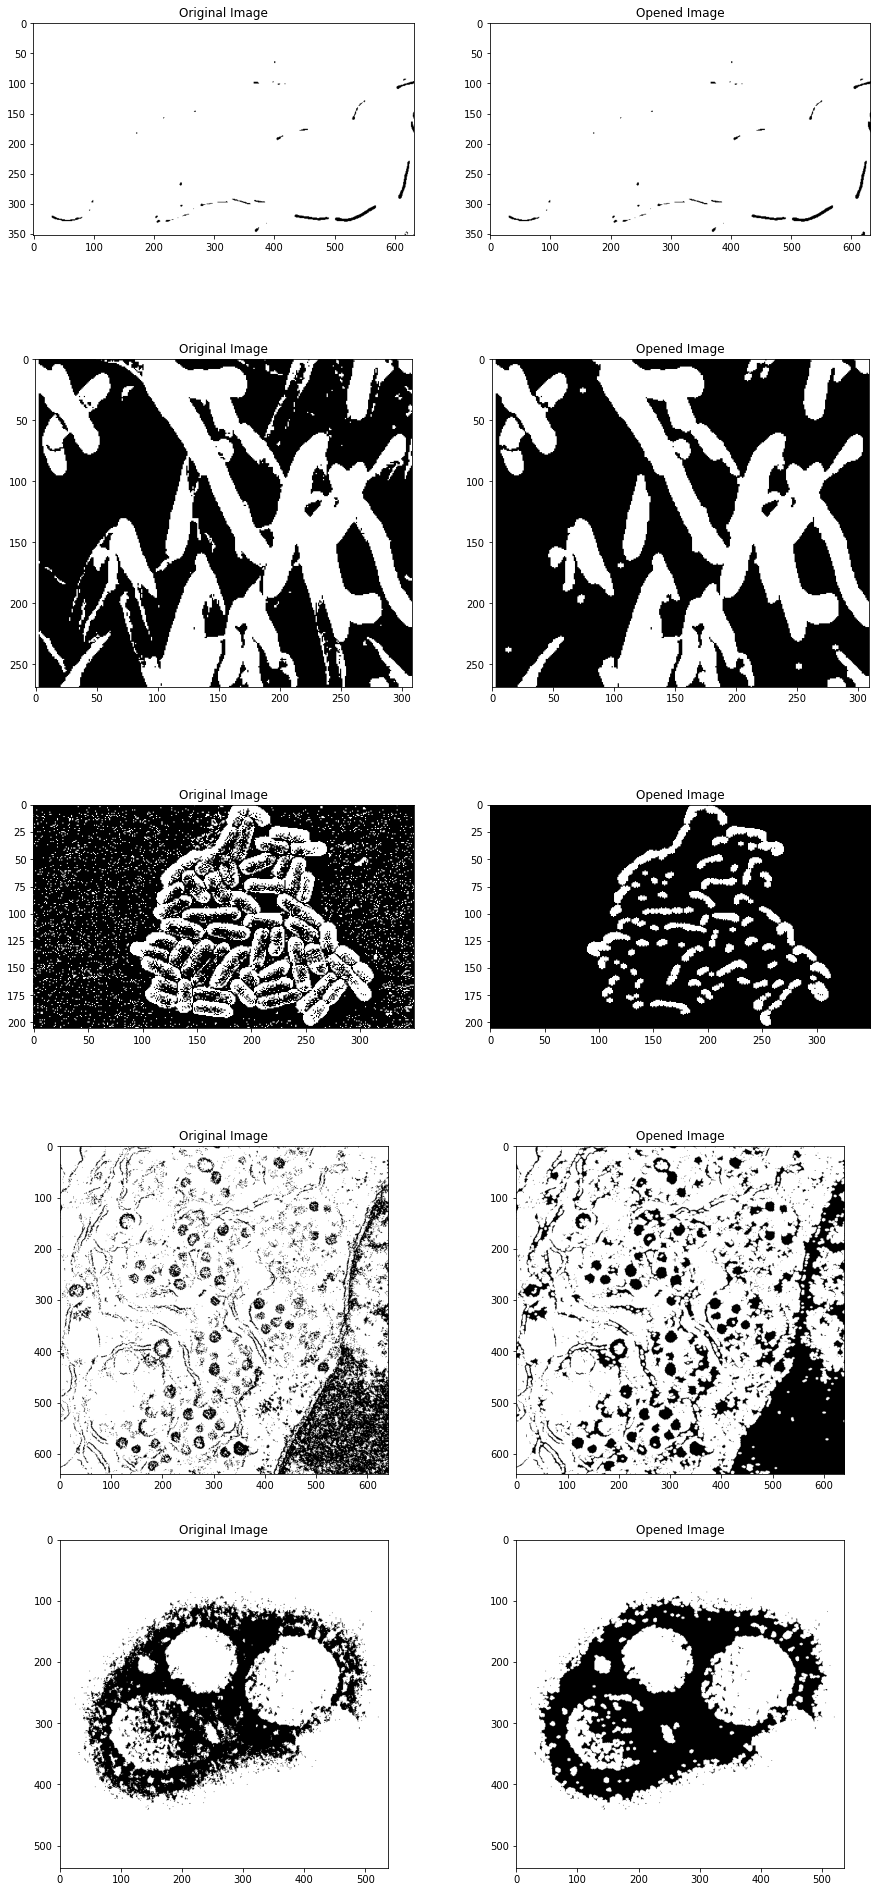

In [13]:
func = lambda a, b: opening(a, b)

apply_filter(func, kernels[1], 'Opened Image')


Kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


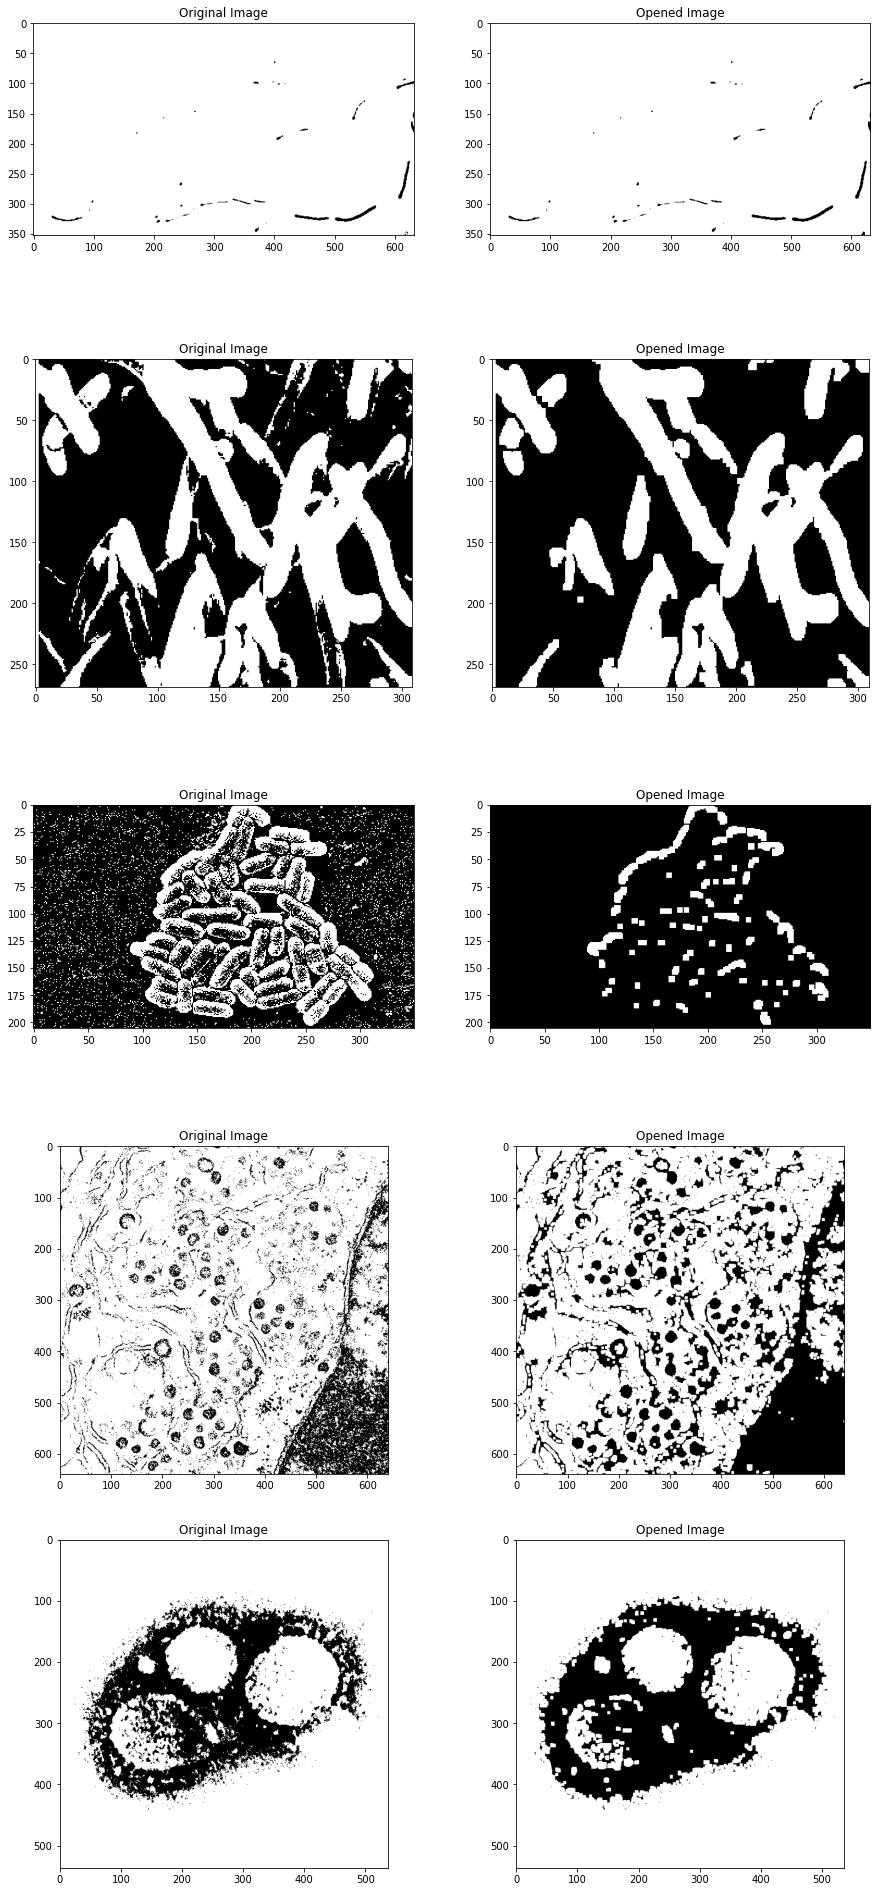

In [14]:
func = lambda a, b: opening(a, b)

apply_filter(func, kernels[2], 'Opened Image')


# Closing

Kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


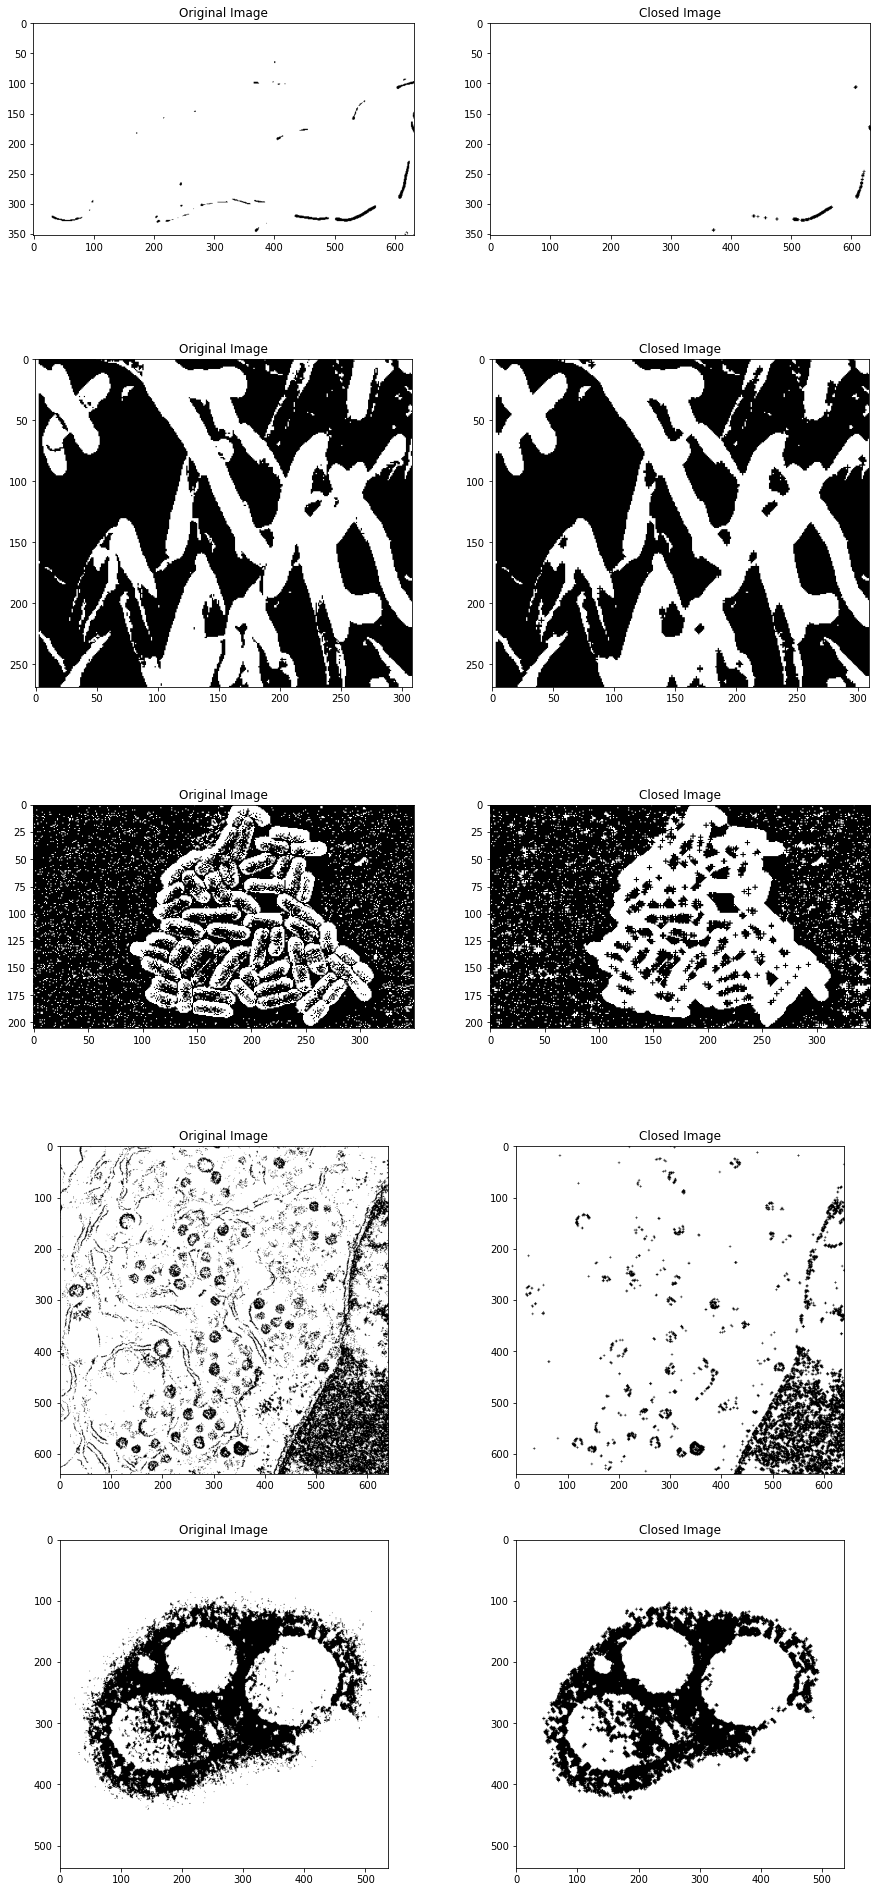

In [15]:
func = lambda a, b: closing(a, b)

apply_filter(func, kernels[0], 'Closed Image')


Kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


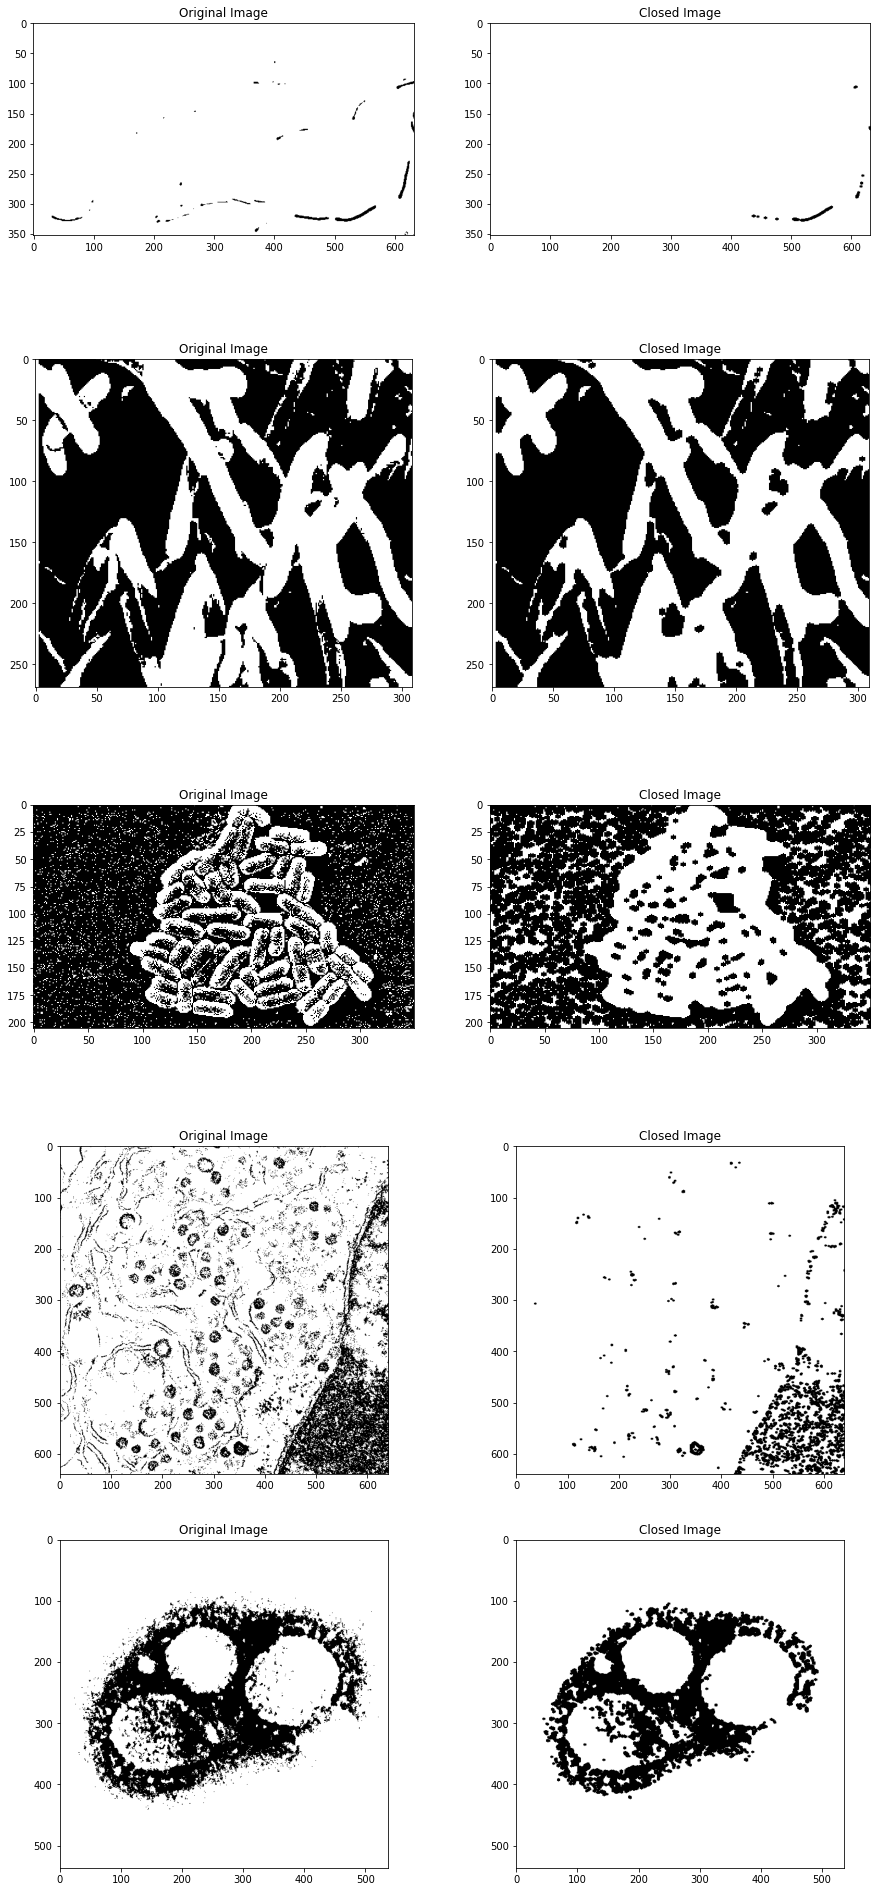

In [16]:
func = lambda a, b: closing(a, b)

apply_filter(func, kernels[1], 'Closed Image')


Kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


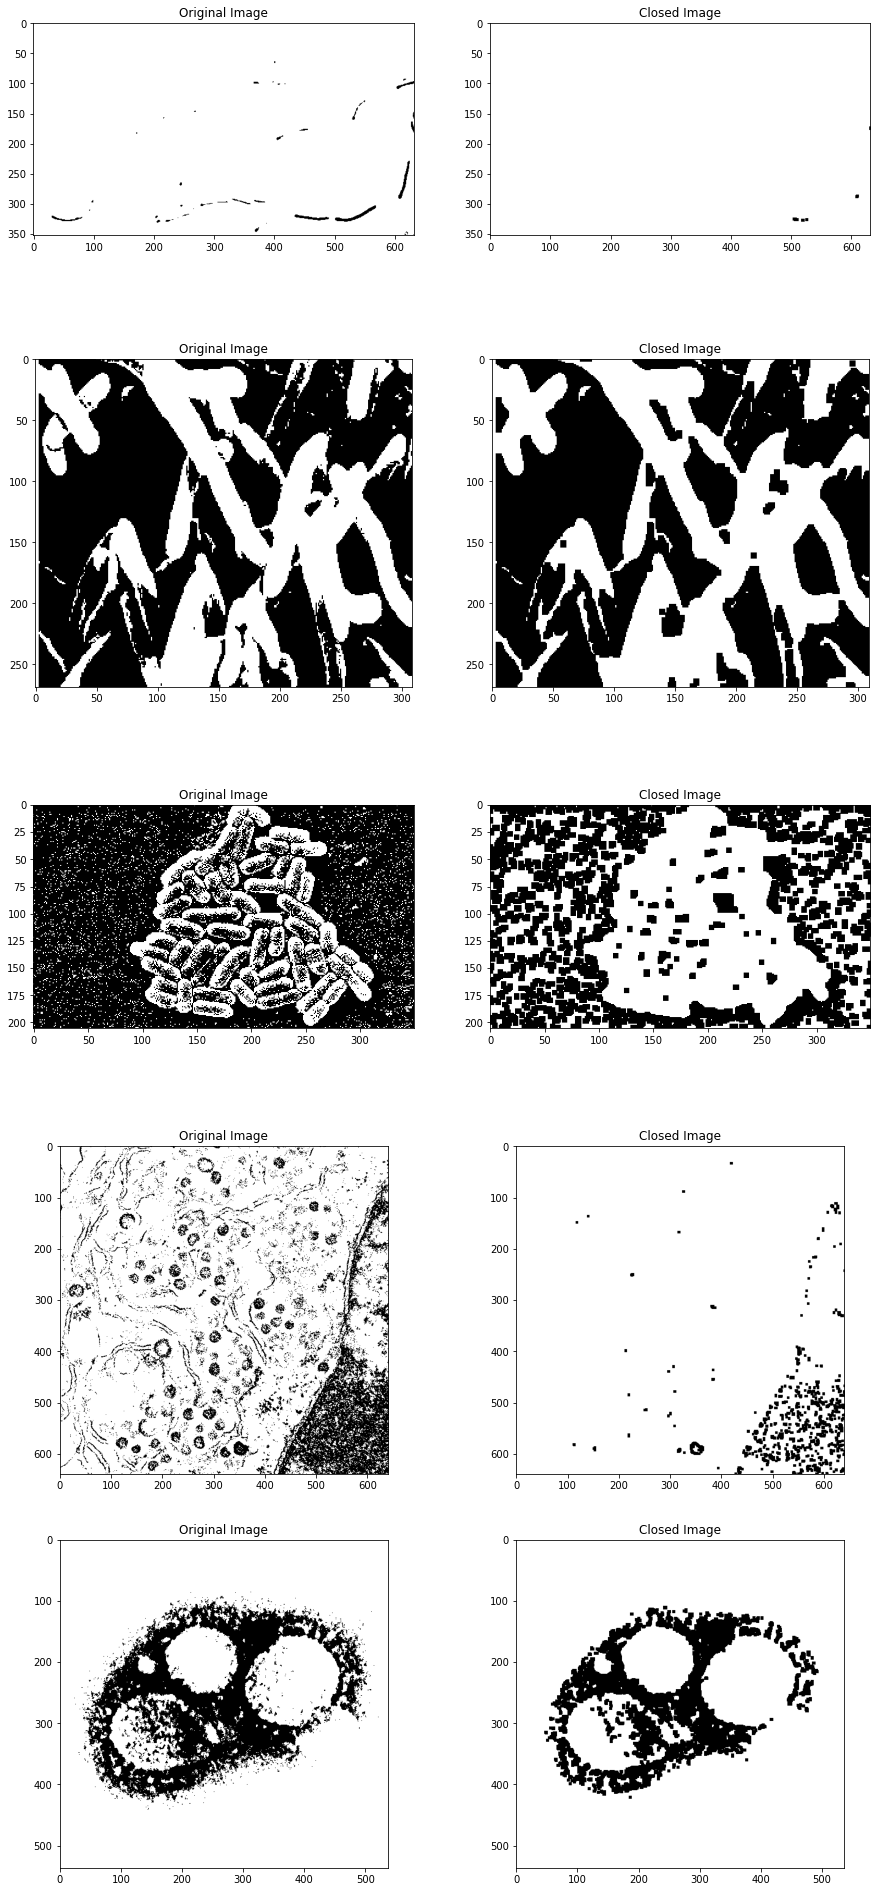

In [17]:
func = lambda a, b: closing(a, b)

apply_filter(func, kernels[2], 'Closed Image')
